<a href="https://colab.research.google.com/github/andositopu/Data-Science/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("SDMU.JK.csv",sep=",",parse_dates={'dt' : ['Date']}, infer_datetime_format=True, index_col='dt')
df

,Open,High,Low,Close,Adj Close,Volume
dt,,,,,,
2020-01-02,50,50,50,50,50,156000
2020-01-03,50,50,50,50,50,100
2020-01-06,50,50,50,50,50,18600
2020-01-07,50,50,50,50,50,100
2020-01-08,50,50,50,50,50,1100
...,...,...,...,...,...,...
2021-11-01,50,50,50,50,50,307500
2021-11-02,50,50,50,50,50,47000
2021-11-03,50,50,50,50,50,5200


In [ ]:
#analisa sementara
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,450.000000,450.000000,450.000000,450.000000,450.000000,4.500000e+02
mean,51.282222,51.955556,50.820000,51.142222,51.142222,3.510853e+06
std,5.402952,6.590658,3.698076,4.479823,4.479823,1.403094e+07
min,50.000000,50.000000,50.000000,50.000000,50.000000,0.000000e+00
25%,50.000000,50.000000,50.000000,50.000000,50.000000,1.000000e+03
50%,50.000000,50.000000,50.000000,50.000000,50.000000,3.675000e+04
75%,50.000000,50.000000,50.000000,50.000000,50.000000,6.413500e+05
max,120.000000,120.000000,84.000000,90.000000,90.000000,1.363007e+08


In [ ]:
#chek tipe data, anggo tulisanni objek maninong iubah hu integer anggolang float, halani objek biasani bentuk huruf lag boi ijumlahkon
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 450 entries, 2020-01-02 to 2021-11-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Open       450 non-null    int64
 1   High       450 non-null    int64
 2   Low        450 non-null    int64
 3   Close      450 non-null    int64
 4   Adj Close  450 non-null    int64
 5   Volume     450 non-null    int64
dtypes: int64(6)
memory usage: 24.6 KB


In [ ]:
#pengamatan mising value/data kosong

df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#grafik sementara
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as go
import matplotlib.pyplot as plt 


plot= go.scatter(df, x=df.index, y=df['Volume'])
plot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



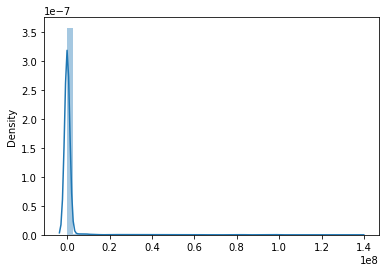

In [ ]:
import seaborn as sns

sns.distplot(df)
plt.show()

In [ ]:
#MinMaxScaller= prosesing data untuk normalisasi data

from sklearn.preprocessing import MinMaxScaler
values = df['Volume'].values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
#pembuatan data trining dan data test dengan data train 70% dan test 30%, data normal biasani minimal training 60%

train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

315 135


In [ ]:
#create_dataset dengan menggunakan function, dengna look_back, look_back= memprediksi hal yangs selanjutnya
import numpy as np

def create_dataset(dataset, look_back=1):
    dataX = []
    dataY = []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [ ]:
#generate data look_back dengan 1 fitur, anggo sihol 3 na iprediksi ganti dengan look_back =3
#mase 1? halani hita fokus pitah bani volume dasa
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

314
134


In [ ]:
# reshape input to be  [samples, time steps, features]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
#pemodelan lstm dengan epochs 20, epoch ai jumlah proses prediksi, semakin banyak jumlah epoch semakin baik, tapi anggo iulang2 trus bisa menambah erorr

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=200, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

No handles with labels found to put in legend.


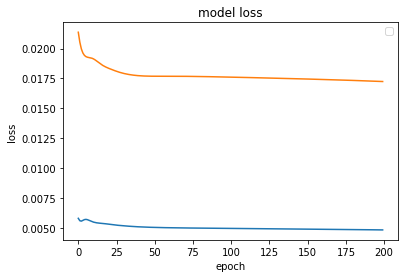

In [ ]:
#plot grafik data training

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


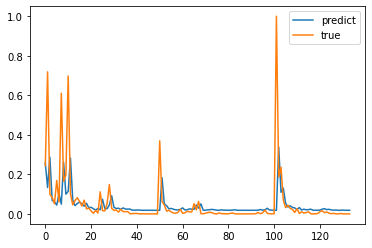

In [ ]:
from matplotlib import pyplot

pyplot.plot(testPredict, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [ ]:
yhat_inverse = scaler.inverse_transform(testPredict.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 17900413.866


In [ ]:
predictDate = df.tail(len(testX)).index

In [ ]:
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, actual_chart])